In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:


base_model = keras.applications.VGG16(
    weights='imagenet',  
    input_shape=(224,224, 3),
    include_top=False)

In [3]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
base_model.trainable = False

In [5]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)


outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False) 

In [9]:

train_it = datagen.flow_from_directory('data/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode='binary', 
                                       batch_size=8)

valid_it = datagen.flow_from_directory('data/test/', 
                                      target_size=(224 ,224), 
                                      color_mode='rgb', 
                                      class_mode='binary', 
                                      batch_size=8)

Found 77 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


Epoch 1/12
5/5 [==============================] - 29s 6s/step - loss: 2.8129 - binary_accuracy: 0.4500 - val_loss: 1.6025 - val_binary_accuracy: 0.4375
Epoch 2/12
5/5 [==============================] - 24s 5s/step - loss: 2.0965 - binary_accuracy: 0.4250 - val_loss: 1.0794 - val_binary_accuracy: 0.5938
Epoch 3/12
5/5 [==============================] - 22s 5s/step - loss: 2.1991 - binary_accuracy: 0.5135 - val_loss: 1.0046 - val_binary_accuracy: 0.6250
Epoch 4/12
5/5 [==============================] - 23s 5s/step - loss: 0.8345 - binary_accuracy: 0.7000 - val_loss: 0.6815 - val_binary_accuracy: 0.6562
Epoch 5/12
5/5 [==============================] - 22s 5s/step - loss: 1.6949 - binary_accuracy: 0.5946 - val_loss: 0.6862 - val_binary_accuracy: 0.6562
Epoch 6/12
5/5 [==============================] - 26s 6s/step - loss: 0.9010 - binary_accuracy: 0.7000 - val_loss: 0.6611 - val_binary_accuracy: 0.7188
Epoch 7/12
5/5 [==============================] - 26s 6s/step - loss: 1.0891 - binary_ac

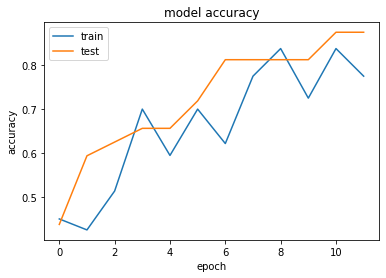

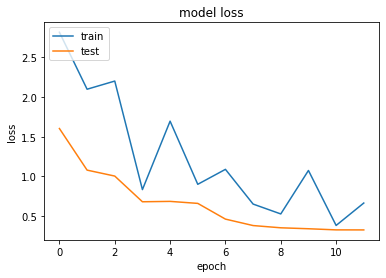

In [10]:
history = model.fit(train_it, steps_per_epoch=5, validation_data=valid_it, validation_steps=4, epochs=12)

print(history.history.keys())

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [22]:
base_model.trainable = True


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

Epoch 1/4
6/6 [==============================] - 64s 10s/step - loss: 0.9034 - binary_accuracy: 0.8444 - val_loss: 0.1459 - val_binary_accuracy: 0.9375
Epoch 2/4
6/6 [==============================] - 59s 10s/step - loss: 0.0543 - binary_accuracy: 0.9778 - val_loss: 0.1403 - val_binary_accuracy: 0.9375
Epoch 3/4
6/6 [==============================] - 62s 11s/step - loss: 0.2149 - binary_accuracy: 0.9375 - val_loss: 0.2450 - val_binary_accuracy: 0.9062
Epoch 4/4
6/6 [==============================] - 63s 11s/step - loss: 0.0244 - binary_accuracy: 0.9792 - val_loss: 0.2024 - val_binary_accuracy: 0.9062
dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


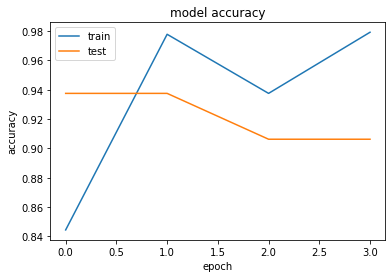

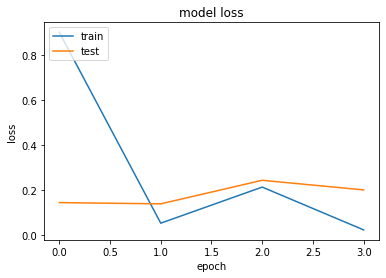

In [23]:
history = model.fit(train_it, steps_per_epoch=6, validation_data=valid_it, validation_steps=4, epochs=4)



print(history.history.keys())

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    
    
    ##負的為輪椅
    if preds[0] < 0:
        print('放下斜坡!!!!')
    else:
        print('GET OUT!!!')
    return preds


model.save('./WheelChair-12-4.h5')


In [4]:
#載入訓練好模組

sv = keras.models.load_model('WheelChair.h5')
sv.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 14,715,201
Non-trainable params: 0
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = sv.predict(image)
    
    
    ##負的為輪椅
    if preds[0] < 0:
        print('放下斜坡!!!!')
    else:
        print('GET OUT!!!')
    return preds

放下斜坡!!!!


array([[-4.173035]], dtype=float32)

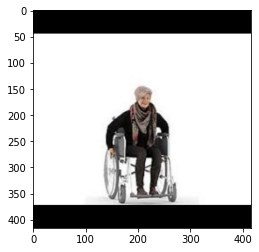

In [25]:
make_predictions('data/img_0214_png.rf.193aac76d41cd8ad0aa711bff8d6ecc3.jpg')

GET OUT!!!


array([[13.901021]], dtype=float32)

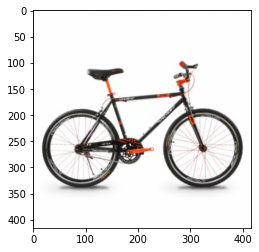

In [26]:
make_predictions('data/bike1_36_png.rf.281557e7fbc0ed9c7591961fd8b0bc84.jpg')

放下斜坡!!!!


array([[-7.670986]], dtype=float32)

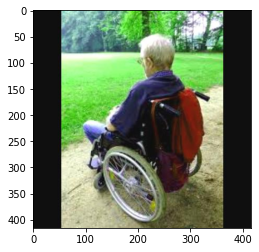

In [27]:
make_predictions('data/img_0187_png.rf.f9ea2eb15e4e1f21bb36e6b11c5ccc55.jpg')


GET OUT!!!


array([[24.817188]], dtype=float32)

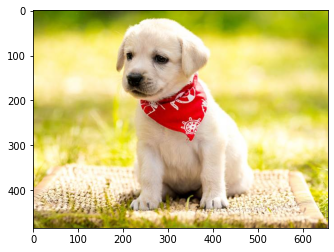

In [28]:
make_predictions('data/20200704002959.jpg')

放下斜坡!!!!


array([[-6.6443677]], dtype=float32)

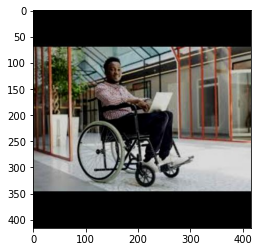

In [29]:
make_predictions('data/img_0267_png.rf.d0c7738c8f745dbe4ab5599f6ca9446a.jpg')

GET OUT!!!


array([[28.058529]], dtype=float32)

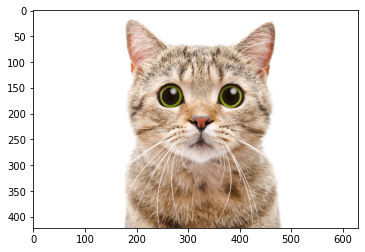

In [30]:
make_predictions('data/article-5bd182cf13ebb.jpg')



GET OUT!!!


array([[0.6454125]], dtype=float32)

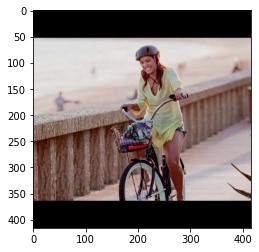

In [31]:
make_predictions('data/bike1_158_png.rf.f3738e7fc050725724793bc48385dacc.jpg')


In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)